In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.cluster import DBSCAN
from sklearn.manifold import TSNE
import pandas as pd
from statsmodels.tsa.stattools import coint
import matplotlib.pyplot as plt


In [2]:
# Load data

df = pd.read_csv('/Users/fuxiyao/Desktop/康奈尔Cornell/2024 Spring/messy Data/5741 project/russell3000_price_financials_energy.csv', index_col='date')
#data from 2014 start to 2022 end as train set
df_train=df.iloc[:2266]
df_train

,10138,10252,10629,10777,10892,10932,10933,11208,11285,11293,...,92951,92976,92987,92999,93014,93070,93299,93304,93330,93374
date,,,,,,,,,,,,,,,,,,,,,
2014-01-02,82.56,38.42,12.43,221.63000,77.46,30.64,574.75000,17.17,16.52,31.58,...,14.86,23.42,23.08,27.71,16.37,9.46,11.78,27.98,42.40000,27.82
2014-01-03,83.30,38.44,12.45,220.72000,76.63,30.46,577.15997,17.08,16.61,31.17,...,14.87,23.43,22.90,27.94,16.44,9.59,11.75,28.00,42.37000,27.55
2014-01-06,83.17,37.97,12.30,221.10001,76.28,30.27,576.50000,16.40,16.52,30.88,...,15.02,23.99,22.81,28.05,16.60,9.57,11.62,27.72,42.40000,27.46
2014-01-07,83.87,38.21,12.74,222.00000,77.04,30.36,573.50000,16.01,16.53,31.14,...,15.14,23.82,22.79,28.10,16.70,9.58,11.78,28.06,43.13000,27.55
2014-01-08,83.92,38.08,12.85,219.09000,76.54,30.58,571.94000,15.75,16.47,31.07,...,15.21,23.14,22.83,28.18,16.58,9.59,11.81,27.39,42.96000,27.49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,111.12,84.80,12.88,751.12000,45.85,46.73,1307.64001,27.20,43.37,37.05,...,13.15,13.20,22.89,19.24,11.30,16.13,54.72,38.33,141.60001,52.39
2022-12-27,110.73,85.26,12.96,750.96002,45.94,46.73,1316.06995,27.28,43.49,37.42,...,13.18,13.15,22.96,19.19,11.40,16.07,54.35,38.39,141.10001,52.58
2022-12-28,108.08,84.50,12.92,748.08002,45.41,46.30,1304.19995,27.23,42.78,36.84,...,12.85,12.56,22.85,18.66,10.90,15.53,52.69,38.19,139.46001,51.13


In [3]:
df_returns = df_train.pct_change().dropna(how='all')



# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_returns)
df_returns

# Transpose the data frame to make stocks (permno) as rows and dates as columns
df_returns = df_returns.transpose()

# Fill any missing values with 0
df_returns=df_returns*10
df_returns = df_returns.fillna(0)

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_returns)
df_returns

date,2014-01-03,2014-01-06,2014-01-07,2014-01-08,2014-01-09,2014-01-10,2014-01-13,2014-01-14,2014-01-15,2014-01-16,...,2022-12-16,2022-12-19,2022-12-20,2022-12-21,2022-12-22,2022-12-23,2022-12-27,2022-12-28,2022-12-29,2022-12-30
10138,0.089632,-0.015606,0.084165,0.005962,-0.075071,0.016809,-0.129450,0.102004,0.087751,-0.013108,...,-0.128617,-0.089577,-0.020086,0.342146,-0.245024,0.076170,-0.035097,-0.239321,0.300703,-0.203898
10252,0.005206,-0.122268,0.063208,-0.034023,0.031513,0.002618,-0.196284,0.045382,0.071751,0.023747,...,-0.004872,0.124299,0.061387,0.132791,-0.034238,0.046203,0.054245,-0.089139,0.080473,-0.088049
10629,0.016090,-0.120482,0.357724,0.086342,0.031128,0.046548,-0.123552,0.015637,-0.039032,-0.101881,...,-0.031646,0.007937,0.087232,0.133648,-0.031032,0.023346,0.062112,-0.030864,0.116099,-0.015302
10777,-0.041059,0.017217,0.040705,-0.131081,0.058423,0.040386,-0.020790,-0.078351,0.097229,-0.056057,...,-0.067246,0.006852,0.055466,0.175150,-0.062777,0.117457,-0.002130,-0.038351,0.133542,0.003825
10892,-0.107152,-0.045674,0.099633,-0.064901,0.037889,0.102824,-0.279567,0.185553,-0.049447,-0.154309,...,0.058611,0.015688,0.040277,0.242924,-0.121845,0.099119,0.019629,-0.115368,0.200396,-0.211572
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93070,0.137421,-0.020855,0.010449,0.010438,-0.010428,0.177453,0.143590,-0.030334,-0.010142,-0.050761,...,-0.093110,0.031328,-0.093691,0.113493,-0.018703,0.074953,-0.037198,-0.336030,0.231809,-0.075519
93299,-0.025467,-0.110638,0.137694,0.025467,-0.152413,-0.275150,0.008842,-0.061837,0.035556,0.186005,...,-0.167077,-0.118047,-0.068778,-0.123929,-0.023990,0.122087,-0.067617,-0.305428,0.140444,0.063635
93304,0.007148,-0.100000,0.122655,-0.238774,0.007302,0.000000,-0.226195,0.156775,0.029401,-0.150238,...,-0.125753,-0.010613,0.092961,0.131579,-0.103896,0.060367,0.015654,-0.052097,0.164965,-0.043792
93330,-0.007075,0.007080,0.172170,-0.039416,0.025605,-0.048758,-0.151657,0.191898,0.418410,-0.020080,...,-0.158038,-0.074838,0.221815,0.199098,-0.214872,0.161464,-0.035311,-0.116230,0.172809,-0.003524


In [4]:
print('Number of all possible pairs: ', df_returns.shape[1]*(df_returns.shape[1]-1)/2)

Number of all possible pairs:  2563980.0


## PCA


In [5]:
N_PRIN_COMPONENTS = 30
pca = PCA(n_components=N_PRIN_COMPONENTS, svd_solver='auto', random_state=0)
pca.fit(scaled_data)
explained_variance = pca.explained_variance_
print(explained_variance)

[926.3097405  179.1532204   61.75278582  37.69076706  34.95960881
  33.75947311  28.86979999  25.53820182  23.84906636  23.2400934
  22.079789    19.59823409  18.19581946  17.61137385  17.29393263
  16.03776552  15.35761805  14.9604673   14.47454887  13.83945002
  13.52027113  13.03826408  12.55478375  12.2891464   11.71757653
  11.47755833  11.1273901   10.98544018  10.72205743  10.56651948]


In [6]:
pca.components_.T.shape

(2265, 30)

In [7]:
X = preprocessing.StandardScaler().fit_transform(pca.components_.T)
kmeans = KMeans(n_clusters=14, random_state=42)
labels = kmeans.fit_predict(X)  # adjust components based on explained variance

print("Labels: ", labels)

Labels:  [13 11  6 ...  7  2  1]


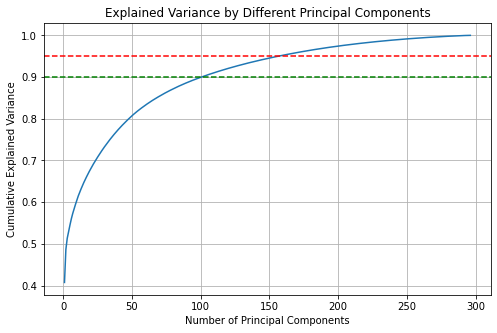

Number of components to explain 90% of variance: 101
Number of components to explain 95% of variance: 157


In [8]:
# Perform PCA
pca = PCA().fit(scaled_data)
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot the explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), cumulative_variance)
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Different Principal Components')
plt.axhline(y=0.95, color='r', linestyle='--')  # Add a horizontal line at 95%
plt.axhline(y=0.90, color='g', linestyle='--')  # Add a horizontal line at 90%
plt.grid(True)
plt.show()

# Find the number of components that explain at least 90% and 95% of the variance
n_components_90 = np.where(cumulative_variance >= 0.90)[0][0] + 1
n_components_95 = np.where(cumulative_variance >= 0.95)[0][0] + 1
print(f"Number of components to explain 90% of variance: {n_components_90}")
print(f"Number of components to explain 95% of variance: {n_components_95}")

In [9]:
#pca = PCA(n_components=2)
#pca_data = pca.fit_transform(scaled_data)
#N_PRIN_COMPONENTS = 50
#pca = PCA(n_components=N_PRIN_COMPONENTS, svd_solver='auto', random_state=0)
#pca.fit(scaled_data)
#explained_variance = pca.explained_variance_
#df_pca = pca.fit(scaled_data)
pca = PCA(n_components=157)  
df_pca = pca.fit_transform(scaled_data)

## Cluster

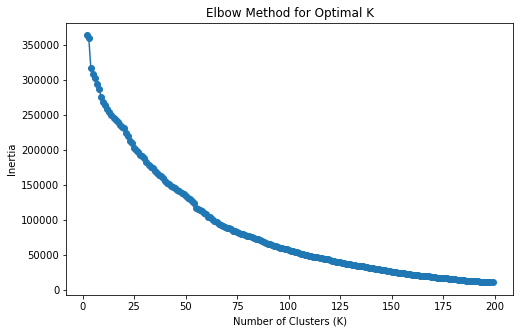

In [10]:
# Determine the optimal number of clusters
inertia = []
K_range = range(2, 200)  

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df_pca)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

In [11]:
optimal_k = 65
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
labels = kmeans.fit_predict(df_pca)  # adjust components based on explained variance
len(labels)

# Add the cluster labels to the dataframe
df_returns['Cluster'] = labels


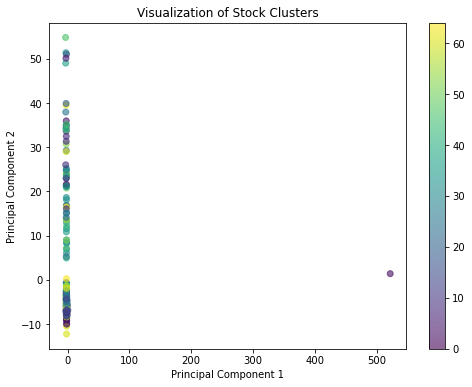

In [12]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(df_pca)

plt.figure(figsize=(8, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=labels, cmap='viridis', alpha=0.6)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Visualization of Stock Clusters')
plt.colorbar()
plt.show()

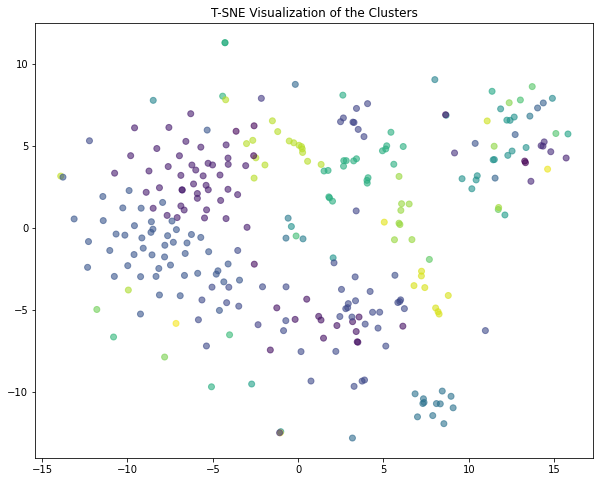

In [13]:
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(df_pca)

plt.figure(figsize=(10, 8))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=labels, cmap='viridis', alpha=0.6)
plt.title('T-SNE Visualization of the Clusters')
plt.show()


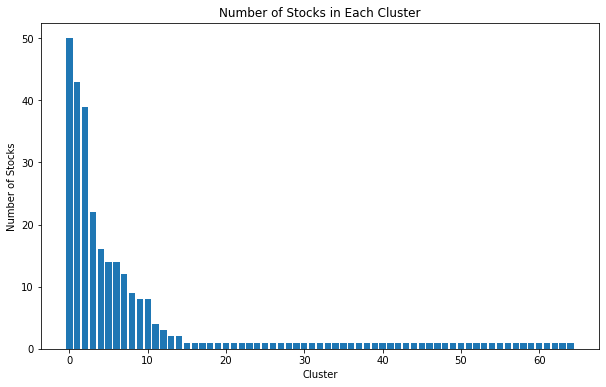

In [14]:
# Plot the number of stocks in each cluster
cluster_counts = df_returns['Cluster'].value_counts()
plt.figure(figsize=(10, 6))
plt.bar(range(len(cluster_counts)), cluster_counts.values)
plt.xlabel('Cluster')
plt.ylabel('Number of Stocks')
plt.title('Number of Stocks in Each Cluster')
plt.show()


In [15]:
for cluster in df_returns['Cluster'].unique():
    print(f"Cluster {cluster}:")
    stocks_in_cluster = df_returns[df_returns['Cluster'] == cluster].index.tolist()
    print(stocks_in_cluster)

Cluster 54:
['10138', '19583', '37584', '68196', '85593', '87267', '90303', '90701']
Cluster 5:
['10252', '10629', '10777', '11293', '11369', '11628', '12068', '16548', '20395', '25129', '35263', '35685', '69586', '75605', '76504', '77415', '77526', '77643', '77679', '78829', '79824', '79859', '80072', '80498', '81577', '82107', '83414', '85789', '85875', '86091', '86432', '86896', '87952', '88197', '88280', '88865', '89395', '89482', '89736', '90037', '91356', '91855', '93304']
Cluster 17:
['10892', '11285', '11397', '11442', '11844', '15070', '36346', '46340', '75906', '77379', '77519', '77528', '78451', '78903', '79013', '79072', '79116', '79166', '80169', '81095', '82573', '83774', '84516', '85299', '85418', '85731', '85860', '86287', '86302', '86382', '86384', '86820', '86965', '87014', '87067', '87614', '88944', '89425', '89443', '89574', '89653', '89828', '90490', '90590', '90591', '90600', '90718', '92318', '92443', '92716']
Cluster 57:
['10932', '16505', '25081', '27888', '347

In [16]:
#select valid clsuter with stock number>1
cluster_counts = df_returns['Cluster'].value_counts()
valid_clusters = cluster_counts[(cluster_counts > 1) & (cluster_counts < 13)].index
#valid_clusters2 = cluster_counts[cluster_counts > 1 ].index
len(valid_clusters)

8

## Find pairs

In [17]:
def find_cointegrated_pairs(data):
    n = data.shape[1]
    score_matrix = np.zeros((n, n))
    pvalue_matrix = np.ones((n, n))
    keys = data.keys()
    pairs = []
    for i in range(n):
        for j in range(i+1, n):
            S1 = data[keys[i]]
            S2 = data[keys[j]]
            result = coint(S1, S2)
            score = result[0]
            pvalue = result[1]
            score_matrix[i, j] = score
            pvalue_matrix[i, j] = pvalue
            if pvalue < 0.025:
                pairs.append((keys[i], keys[j]))
    return score_matrix, pvalue_matrix, pairs

Cluster 24


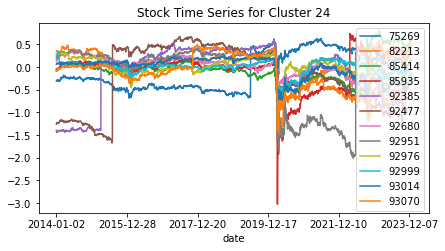

[('75269', '92951'), ('92999', '93014'), ('92999', '93070')] 

Cluster 13


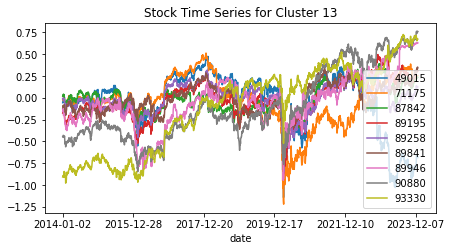

[] 

Cluster 60


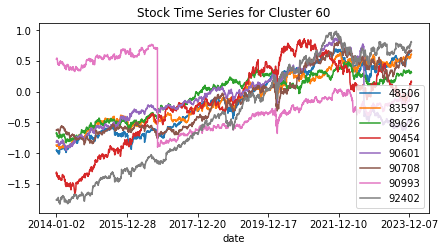

[('48506', '92402')] 

Cluster 54


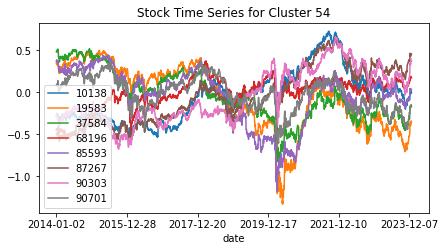

[] 

Cluster 8


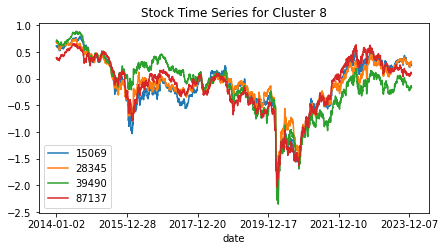

[('15069', '28345')] 

Cluster 1


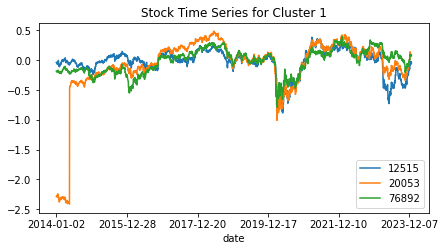

[('20053', '76892')] 

Cluster 19


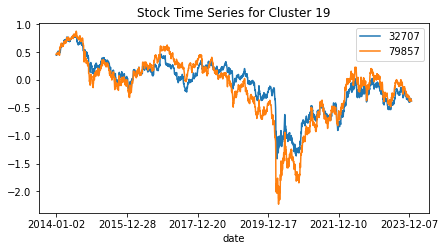

[] 

Cluster 0


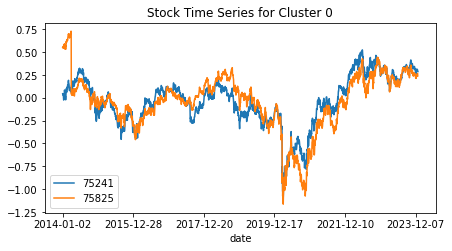

[('75241', '75825')] 

All cointegrated pairs: [('75269', '92951'), ('92999', '93014'), ('92999', '93070'), ('48506', '92402'), ('15069', '28345'), ('20053', '76892'), ('75241', '75825')]


In [18]:
# Perform time series graphing and cointegration tests for each valid cluster
clustered_dict = {}
for cluster_number in valid_clusters:
    ticker_list = df_returns[df_returns['Cluster'] == cluster_number].index
    clustered_dict[cluster_number] = ticker_list

conint_pairs = []
for cluster_i, ticker_list in clustered_dict.items():
    print(f"Cluster {cluster_i}")
    prices_df = df.loc[:, ticker_list]
    means = np.log(prices_df.mean())
    series = np.log(prices_df).sub(means)
    series.plot(figsize=(7, 3.5))
    plt.title(f'Stock Time Series for Cluster {cluster_i}')
    plt.show()
    
    scores, pvalues, pairs = find_cointegrated_pairs(prices_df)
    print(pairs, '\n')
    conint_pairs.extend(pairs)

print("All cointegrated pairs:", conint_pairs)

In [19]:
stock_info = pd.read_csv('/Users/fuxiyao/Desktop/康奈尔Cornell/2024 Spring/messy Data/5741 project/russell3000_price.csv')

for pair in conint_pairs:
    stock1_info = stock_info[stock_info['PERMNO'] == int(pair[0])]
    stock2_info = stock_info[stock_info['PERMNO'] == int(pair[1])]
    
    if not stock1_info.empty and not stock2_info.empty:
        stock1_ticker = stock1_info['TICKER'].values[0]
        
        stock2_ticker = stock2_info['TICKER'].values[0]
        
        
        print(f"Pair: ({stock1_ticker}, {stock2_ticker})")
    
    else:
        print(f"Pair: {pair}")
        print("Stock information not found in russell3000_universe.csv")
    
    print()

/Users/fuxiyao/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Pair: (DX, IVR)

Pair: (STWD, ARI)

Pair: (STWD, TWO)

Pair: (MCO, MSCI)

Pair: (MRO, MUR)

Pair: (SNV, BOKF)

Pair: (PXD, EOG)



In [20]:
# test the pair using data from 2014-1-2 to 2023-12-30
def check_cointegration(data, stock1, stock2):
    score, p_value, _ = coint(data[stock1], data[stock2])
    print(f"Cointegration test for {stock1} and {stock2}:")
    print(f"Score: {score:.4f}")
    print(f"P-value: {p_value:.4f}")
    if p_value < 0.05:
        print("The two stocks are likely cointegrated.")
    else:
        print("The two stocks are likely not cointegrated.")
        print(stock1,stock2)
    print()

In [21]:
pairs = conint_pairs

In [91]:
for stock1, stock2 in pairs:
    check_cointegration(df, str(stock1), str(stock2))

Cointegration test for 75269 and 92951:
Score: -3.8475
P-value: 0.0117
The two stocks are likely cointegrated.

Cointegration test for 92999 and 93014:
Score: -3.6302
P-value: 0.0225
The two stocks are likely cointegrated.

Cointegration test for 92999 and 93070:
Score: -3.7937
P-value: 0.0138
The two stocks are likely cointegrated.

Cointegration test for 59408 and 60442:
Score: -3.7350
P-value: 0.0165
The two stocks are likely cointegrated.

Cointegration test for 69032 and 86868:
Score: -3.8624
P-value: 0.0112
The two stocks are likely cointegrated.

Cointegration test for 15069 and 28345:
Score: -4.3886
P-value: 0.0019
The two stocks are likely cointegrated.

Cointegration test for 75241 and 75825:
Score: -4.1571
P-value: 0.0042
The two stocks are likely cointegrated.

